### *Introduction*

**Brief about data:**
<br>

Food authentication in the industries and global market, is always a big challege. Claim over grade and no adulteration with other varities, increases the price of the prdouct. This study tries to classifiy the dry beans in seven different varities on the basis of 16 different features.

**Overview:**
<br>

* It is very important for checking out few boxes before going for data exploration or modeling,

  1. Checking for missing values,
  2. Checking Duplicates,
  3. Checking the distribution of the data (multivariate normal is more suitable),
  4. Outlier Detection (extreme value),
  5. Checking for Colinearity.

  Under preprocessing we checked all the peculiarities of the dataset and treated with suitable statistical solutions.
  <br>

* Pre-processing stages with the tools used,
 1. Autoscaling with Standard Scaler,
 2. Joint Normality/Multivariate Normality checking with Chi-square plot and Shapiro-Wilk's test,
 3. Individual distribution checking with Histogram,
 4. Box-Cox transformation for converting non-normal data into normal data,
 5. Outlier detection with Mahalnobis Distance and PCA biplot for each class,
 6. Perfect and Absolute Colinearity checking with rank of the matrix and pearson correlation-heat map.

<br>

* Finally we went ahead with three types of data to check how modeling
 gets affected by the above pecuilarities,

 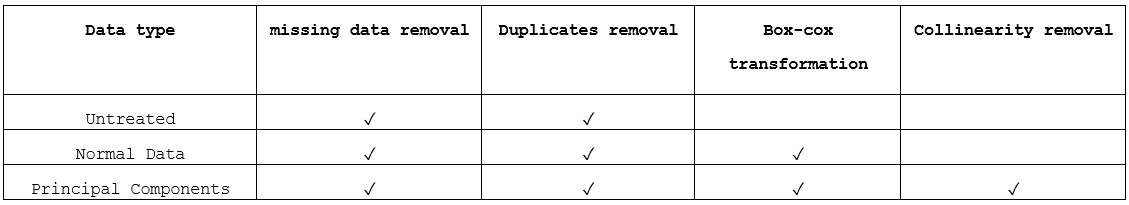

 It was an important decision to not remove outliers (extreme values),
 As we don't know much about the accuracy of the data collection process, we can't directly term it as outliers. It might happen that those are properties of the dry beans, it is important to keep those informations also in data.

 <br>

* We have performed four types of multi-class classification algorithms,
  1. Support Vector Machine (SVM),
  2. Gaussian Naive Bayes,
  3. K Nearest Neighbors (kNN),
  4. Random Forest (RF). 

  We found RF with untreated data to be the best algorithm in terms of evaluation metrices like, accuracy and F1 Score, it might be because the ensemble algorithm doesn't get affected by multicollinearity and doesn't bother about the distribution it follows.

<br>

  For detailed discussion, please go through the notebook.

### *Libraries and Data Importing*

In [ ]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pca import pca
from scipy.stats import chi2
from scipy.stats import shapiro
from scipy.stats import boxcox
from matplotlib import patches
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix, plot_confusion_matrix, classification_report,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt

In [2]:
#Installing PCA library

pip install pca

In [ ]:
#Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the Data

df = pd.read_csv("/content/drive/MyDrive/DryBeanProblem_Abishek and Sudipta/DryBeanDataset/Dry_Bean_Dataset.csv")
headers = list(df.columns)
df

# Data contains 13611 samples and 17 features

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


### *Preprocessing*

##### a) *Checking & Removal of Duplicates*

In [ ]:
# Checking how many samples are Duplicates,
print('Numnber of duplicate {}' .format(df.duplicated(subset=None, keep= 'first').sum()))

# Deleting the duplicates
df = df.drop_duplicates()

Numnber of duplicate 68


##### b) *Checking for missing values*

In [ ]:
# Data Information: It contains information about data types and missing/null values

df.info()

# Conclusion: 
# a. Output shows that there in no-null values 
# b. Output shows that there are three types of data, 1. integer: Area, ConvexArea, 2. String/Object: Class, 3. float: other features.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(1

##### c) *Dividing data into Independent and Dependent variables*

In [ ]:
# Dividing independent variables as X, and dependent variables as y.

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

##### c) *Auto-scaling of the data*

In [ ]:
scaler = StandardScaler()
model = scaler.fit(X)

##### d) *Joint Normality Checking*

Text(0.5, 1.0, 'Chi-square plot for Multivariate Normality')

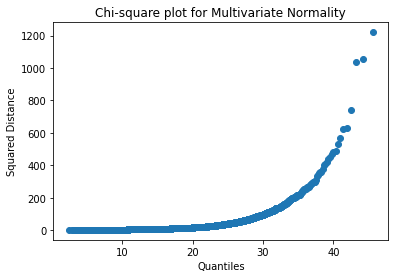

In [ ]:
# Chisq plot for Checking Multivariate Normal/ Joint Normality,

S = np.cov(np.transpose(X))

colsMean =[]
colMean =[]
for i in range(X.shape[1]):
  colMean = X.iloc[:, i].mean()
  colsMean.append(colMean) 


dsq = []
invS = np.linalg.inv(S)
for i in range(X.shape[0]):
    m = np.dot(np.transpose(X.iloc[i,:]-colsMean), invS)
    sq = np.dot(m, X.iloc[i,:]-colsMean)
    dsq.append(sq) 

sdsq = dsq.sort()
p = X.shape[1]
n = X.shape[0]

pr = []
q = []
s =[]

for i in range(n):
  pr = (i-0.5)/n
  s = chi2.ppf(pr, p)
  q.append(s)

plt.scatter(q, dsq)
plt.xlabel('Quantiles')
plt.ylabel('Squared Distance')
plt.title('Chi-square plot for Multivariate Normality')

In [ ]:
# Shapiro-Wilk's test for checking Multivariate Normality
shapiro(X)

# Conclusion: As build-in Shapiro-Wilk's test can test samle size more than 5000, we have went with subjective decision, and as we can see data is not normal.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.37574172019958496, pvalue=0.0)

##### e) *Checking Normality for Individual variables*

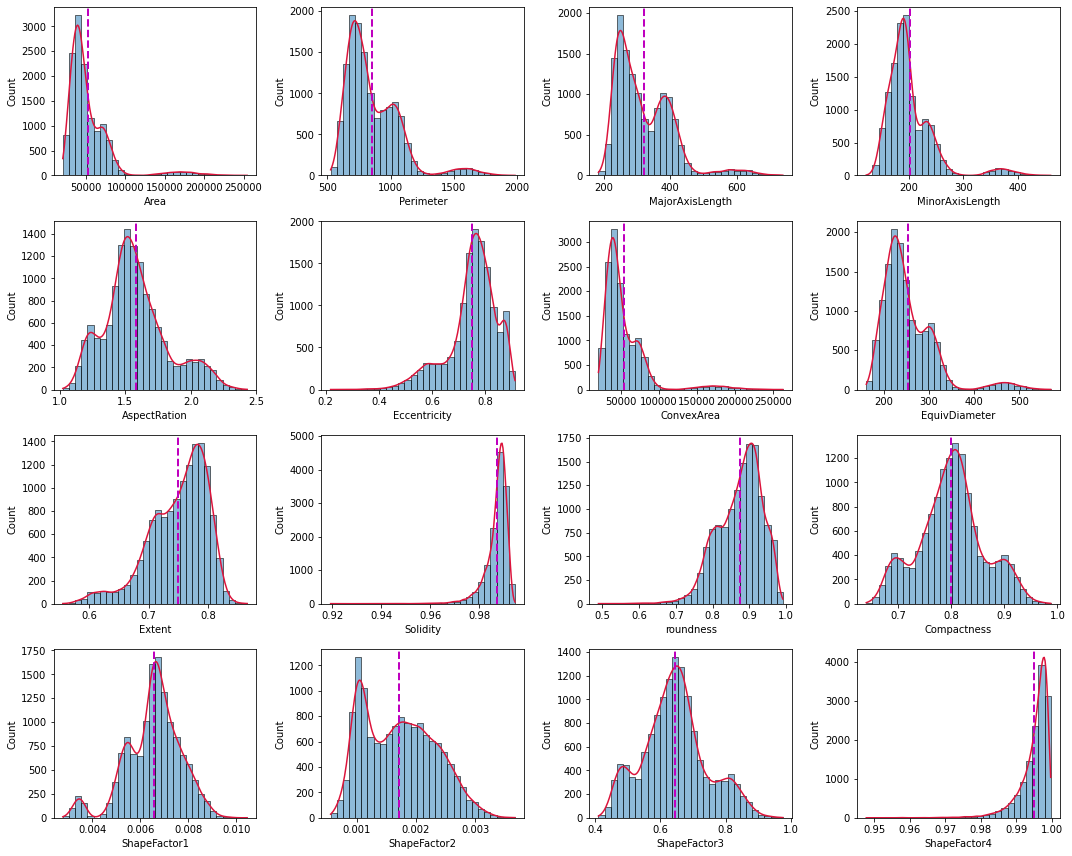

In [ ]:
Numeric_cols = X.columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(X[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=X[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()


##### f) *Box-Cox transformation to convert data into multivariate Normal*

In [ ]:
# Box-Cox transformation class-wise(each categories are separate population) to get Normal Data

X_n = X

for i, value in enumerate(X_n):
  A,_ = boxcox(X_n[value])
  X_n[value] = A

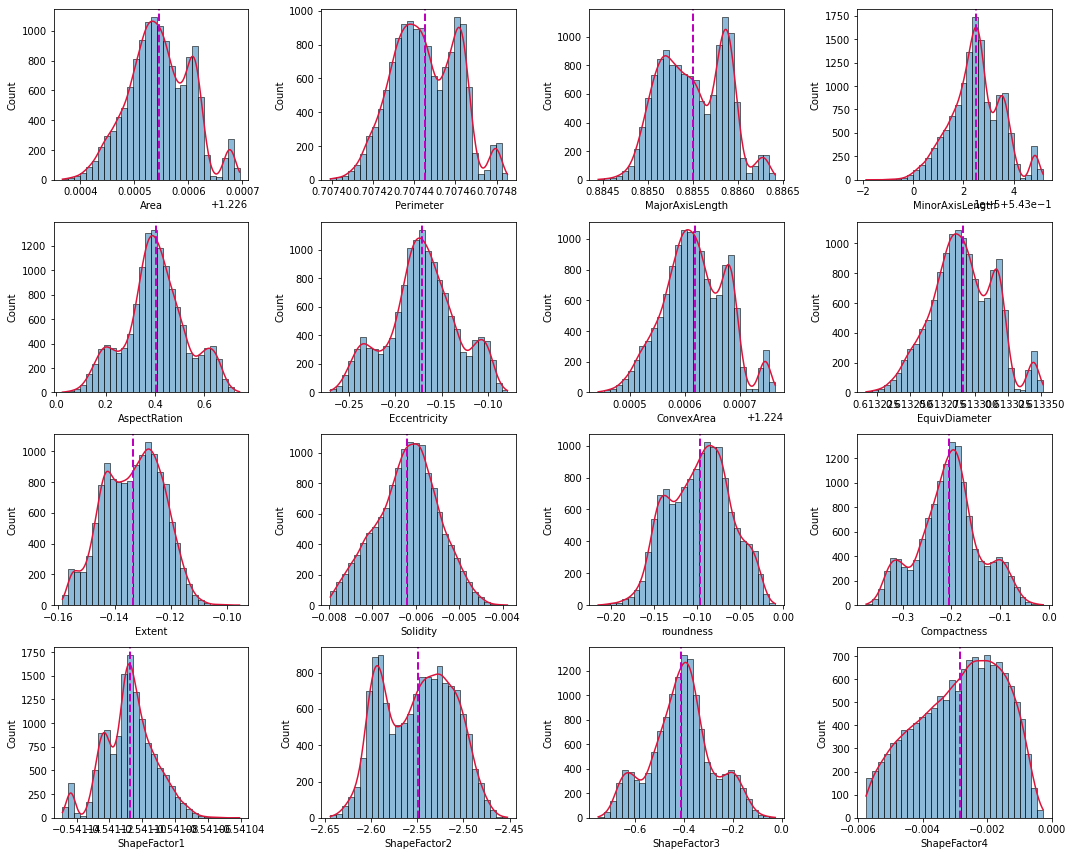

In [ ]:
# After Transformation
Numeric_cols = X_n.columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(X_n[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=X_n[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

In [ ]:
### New Normalized Dataset

df_new = pd.concat([X_n, y], axis =1)

##### g) *Outlier detection for each class*

> i) *With Mahalnobis Distance for Objective Decision*



In [ ]:
# Multivariate Outlier Detection with mahalnobis distance,
# Multivariate Outlier Detection with mahalnobis distance,

X_new = X_n

# df_new
for j in y.unique():
  D = X_new[df_new['Class'] == j]
  # Covariance matrix
  covariance  = np.cov(D , rowvar=False)
  # Covariance matrix power of -1
  covariance_pm1 = np.linalg.inv(covariance)
  # Center point
  centerpoint = np.mean(D, axis=0)
  # Distances between center point and 
  distances=[]
  for i in range(D.shape[0]):
      m = np.dot(np.transpose(D.iloc[i,:]-centerpoint), covariance_pm1)
      distance = np.dot(m, D.iloc[i,:]- centerpoint)
      distances.append(distance)
  distances = np.array(distances)

  # Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
  cutoff = chi2.ppf(0.95, D.shape[1])

  # Index of outliers
  outlierIndexes = np.where(distances > cutoff)

  print('\n--- Index of Outliers ----\n')
  print(j, outlierIndexes)
  print('Percentage of outliers in '+ j + ' category are {}'.format(round(((sum(distances > cutoff)/D.shape[0])*100), 2)) ) #With Normalization it became 99, maybe because I haven't done Normalization for each class




--- Index of Outliers ----

SEKER (array([   0,    1,    2,    3,    4,    6,   22,   23,   24,   38,   42,
         67,   85,   95,  104,  107,  131,  136,  197,  210,  214,  220,
        271,  278,  293,  354,  364,  368,  401,  409,  430,  432,  434,
        440,  445,  459,  467,  484,  521,  543,  553,  645,  666,  712,
        755,  758,  788,  790,  803,  814,  832,  839,  853,  864,  870,
        912,  967,  989, 1030, 1035, 1063, 1073, 1109, 1188, 1216, 1226,
       1233, 1240, 1278, 1288, 1305, 1319, 1338, 1341, 1351, 1352, 1363,
       1388, 1391, 1402, 1418, 1421, 1429, 1455, 1458, 1501, 1522, 1552,
       1555, 1595, 1630, 1642, 1665, 1683, 1693, 1704, 1705, 1706, 1707,
       1725, 1726, 1733, 1746, 1756, 1760, 1768, 1796, 1800, 1807, 1831,
       1838, 1844, 1849, 1864, 1871, 1875, 1900, 1910, 1922, 1923, 1935,
       1949, 1951, 1955, 1961, 1972, 1983, 1990, 1992, 1995, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2013, 2014, 2015, 2016,
       2017, 20

> ii) *With DmodX & PCA for Subbjective Decision*



[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [85.0%] explained variance using the [16] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [85.00%] explained variance.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


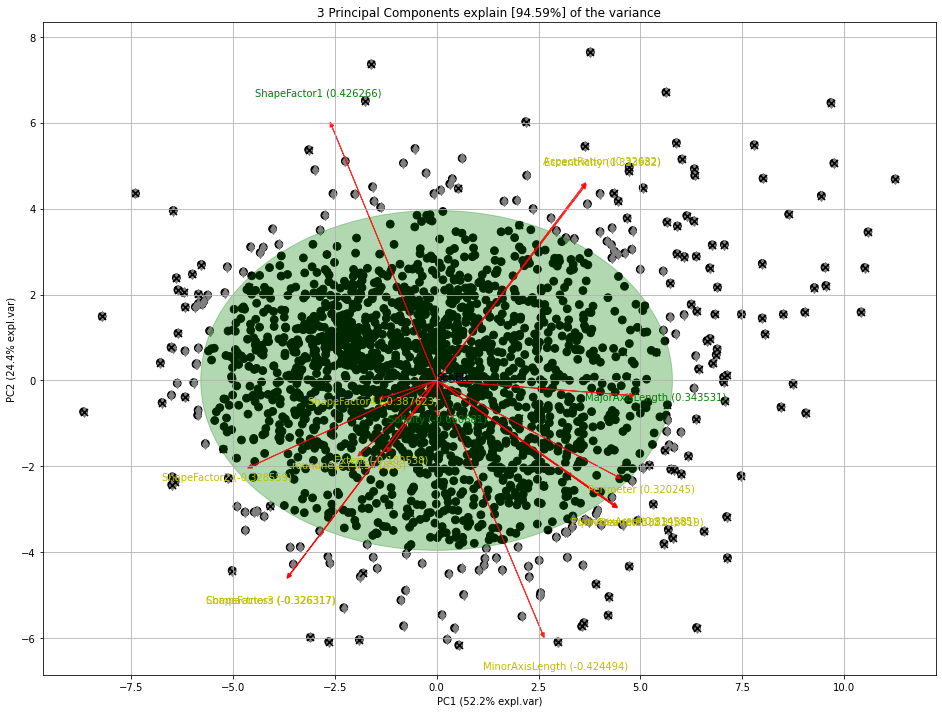

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [85.0%] explained variance using the [16] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [85.00%] explained variance.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


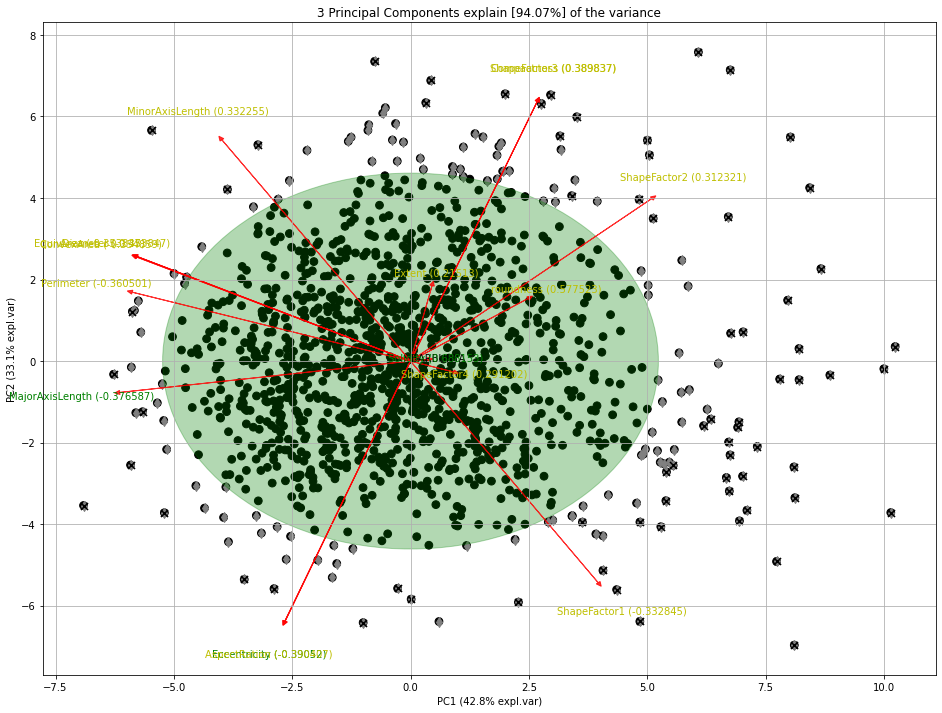

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [85.0%] explained variance using the [16] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [85.00%] explained variance.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


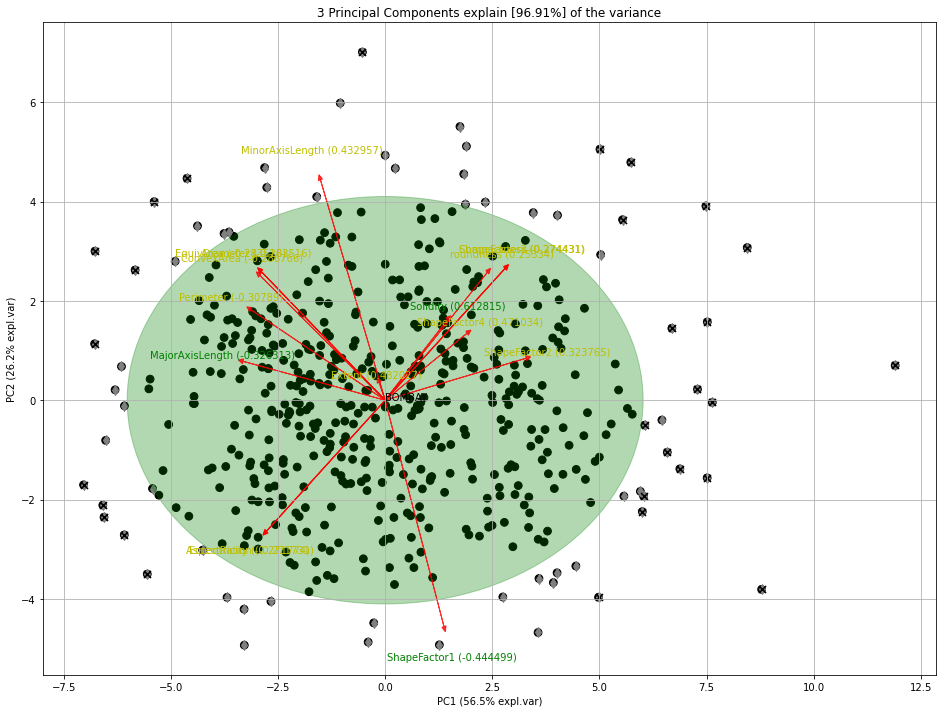

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [85.0%] explained variance using the [16] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [85.00%] explained variance.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


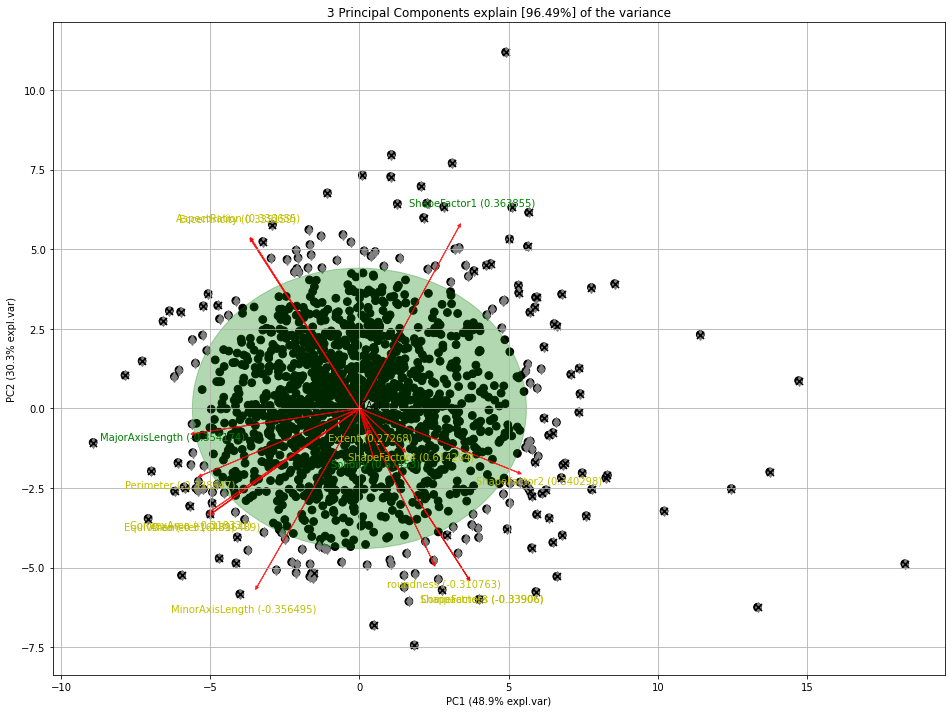

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [85.0%] explained variance using the [16] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [85.00%] explained variance.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


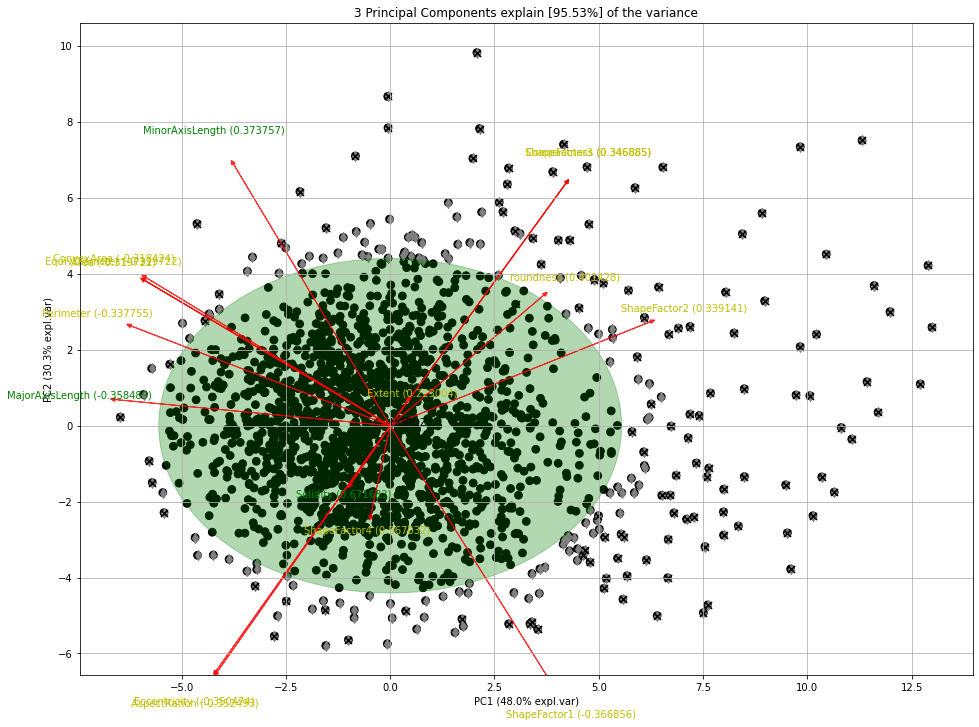

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [85.0%] explained variance using the [16] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [85.00%] explained variance.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


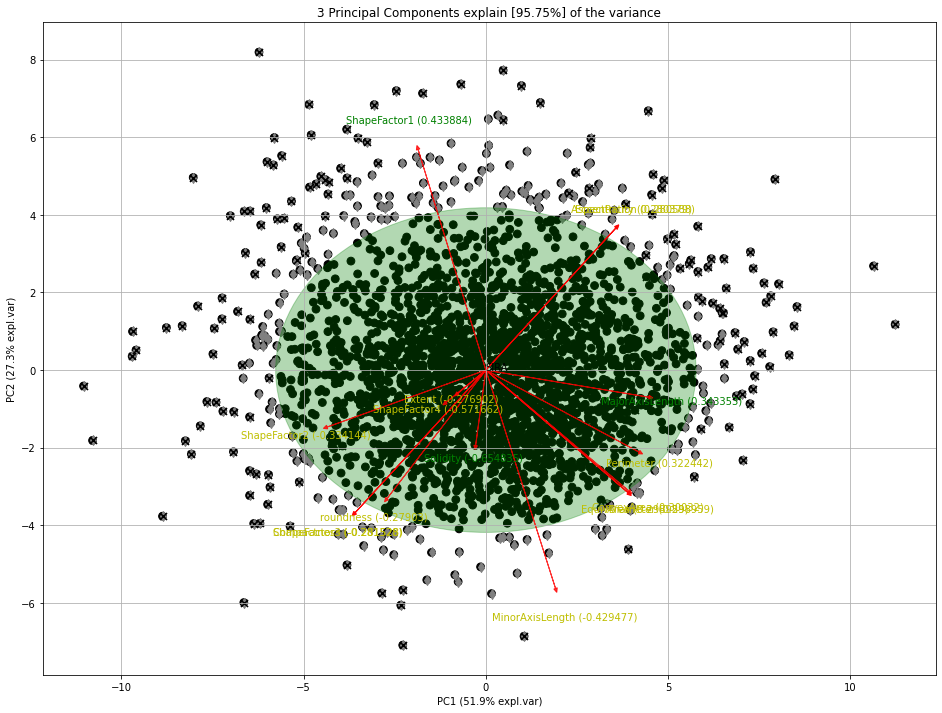

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [85.0%] explained variance using the [16] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [85.00%] explained variance.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


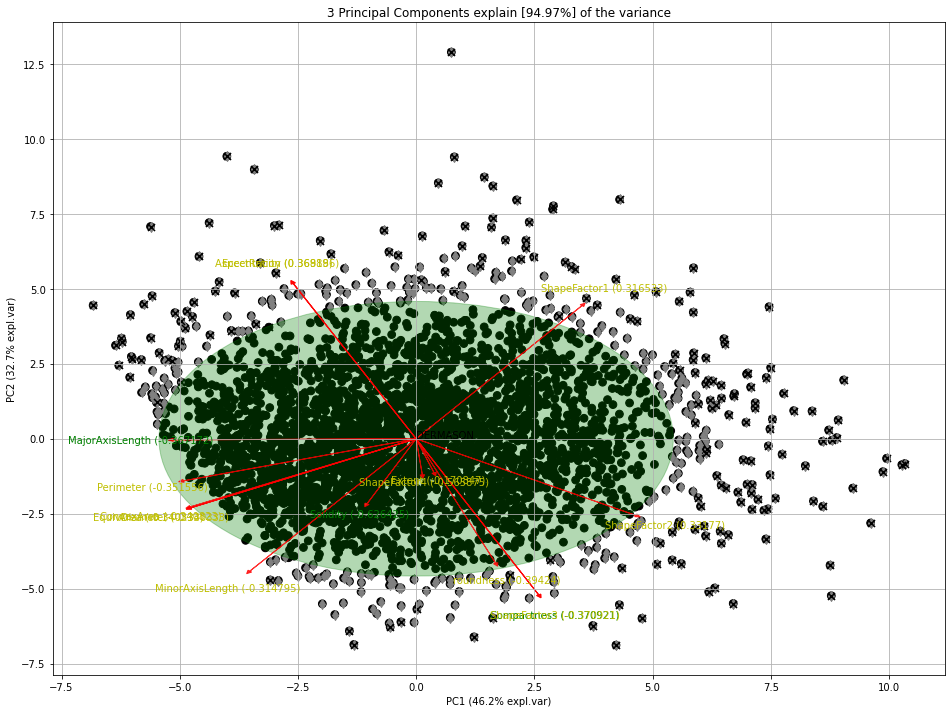

In [ ]:
X_new = X_n
for j in y.unique():
  D = X_new[df_new['Class'] == j]
  D_Class = y[y == j]
  model=pca(n_components=0.85, normalize=True)  #By how many components 85% of information is explained
  results = model.fit_transform(D)
  loadings=results['loadings']
  scores=results['PC']
  scores['lables']= D_Class

  # Include the outlier detection with hotelling t2
  model.biplot(n_feat=16,  legend=False, figsize=(16,12), y = D_Class, label=True, SPE=True, hotellingt2=True)
  plt.show()



# D_BOMBAY
# D_Class = X_new.iloc[:,-1][X_new['Class'] == 'BOMBAY']

##### h) *Colinearity of the Dataset*

In [ ]:
# Checking Rank of the Matrix,

Matrix = X_n.to_numpy()

print("The Dataset has {} columns, but the rank of the dataset is {}." .format(Matrix.shape[1], np.linalg.matrix_rank(Matrix)))

# Conclusion: Data has Colinearity. We need to perform analysis with algorithms which nullify the affect.

The Dataset has 16 columns, but the rank of the dataset is 15.


### *Data Exploration*

**Overview:**
* In Data Exploration Phase, The Normalized Data target variables are inspected, basic statistics check is performed, Univariate and Multi variate Analysis are Performed for the same.
* The Target variables are inspected by counting the number of records in each class.
* The basic statistics such as count, std, mean, min and max for each features are displayed.
* The Univariate Plot of each feature is shown below.
* The Multivariate Plot is performed using PCA where dimensionality reduction happens and the features are reduced to 3 from the original 16 which provides 94.85% of the variance.

##### a) *Inspecting Target Variables*

The different classes are ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


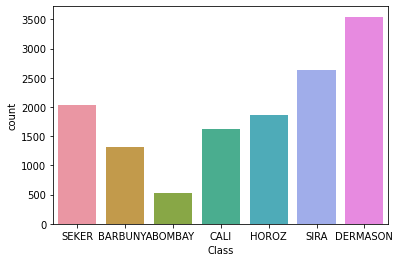

In [ ]:
#Checking number of classes

print('The different classes are {}' .format(df_new['Class'].unique()))

sns.set_palette("PRGn")
sns.countplot(x = 'Class', data = df_new)

##### b) *Checking basic statistics of the Normalized Data Set*

In [ ]:
# Basic Statistics of the Dependent Normalized Variables

df_new.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13543.000000,13543.000000,1.354300e+04,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000
mean,27129.042943,26442.989818,4.200658e+05,2343.786273,0.734095,-0.166538,23562.874189,17772.887410,-0.201741,-0.006193,-0.083834,-0.369200,-2021.877535,-23561.864209,-0.738401,-0.003026
std,67233.914462,66282.065891,1.078727e+06,4646.571054,0.798694,0.084253,58218.121890,44170.325748,0.084420,0.002295,0.040866,0.398459,4019.503271,59542.476502,0.796918,0.002096
min,0.833737,0.318670,5.043389e-01,0.330711,0.023820,-0.492525,0.810741,0.416869,-0.548786,-0.016257,-0.220242,-2.274744,-14031.907670,-296760.979367,-4.549488,-0.013262
25%,14.114709,12.265495,3.705752e+00,3.006563,0.326440,-0.187558,15.614239,7.246123,-0.241387,-0.006670,-0.122377,-0.400061,-171.445088,-2675.805058,-0.800122,-0.003892
50%,306.335090,40.341432,2.874564e+02,16.761393,0.393266,-0.162169,238.771985,170.990386,-0.199201,-0.005341,-0.072610,-0.195714,-16.537035,-21.706918,-0.391427,-0.002416
75%,1449.557647,864.675599,4.742664e+02,222.949732,0.776577,-0.097347,1465.513592,847.370245,-0.133440,-0.004867,-0.051203,-0.162943,-2.729681,-2.654016,-0.325886,-0.001503
max,311225.274681,294109.821472,5.203706e+06,16015.586927,4.677612,-0.047667,267499.828226,204387.161401,-0.087945,-0.003265,-0.008569,-0.012374,-0.342428,-0.752373,-0.024748,-0.000247


##### b) *Pearson linear correlation-Heat Map*

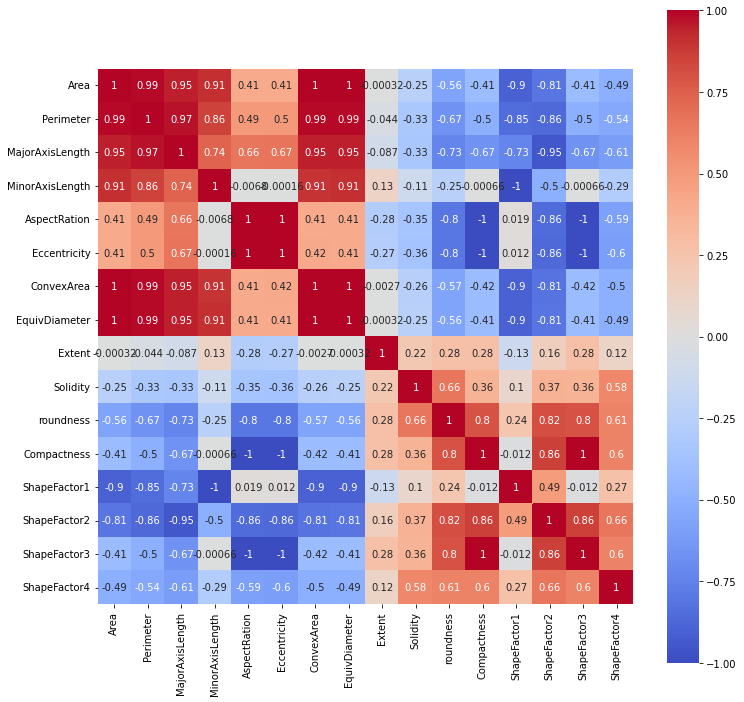

In [ ]:
# Heatmap

plt.figure(figsize=(12,12))
sns.heatmap(X_n.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

##### c) *Univariate Analysis of the Normalized Dataset*

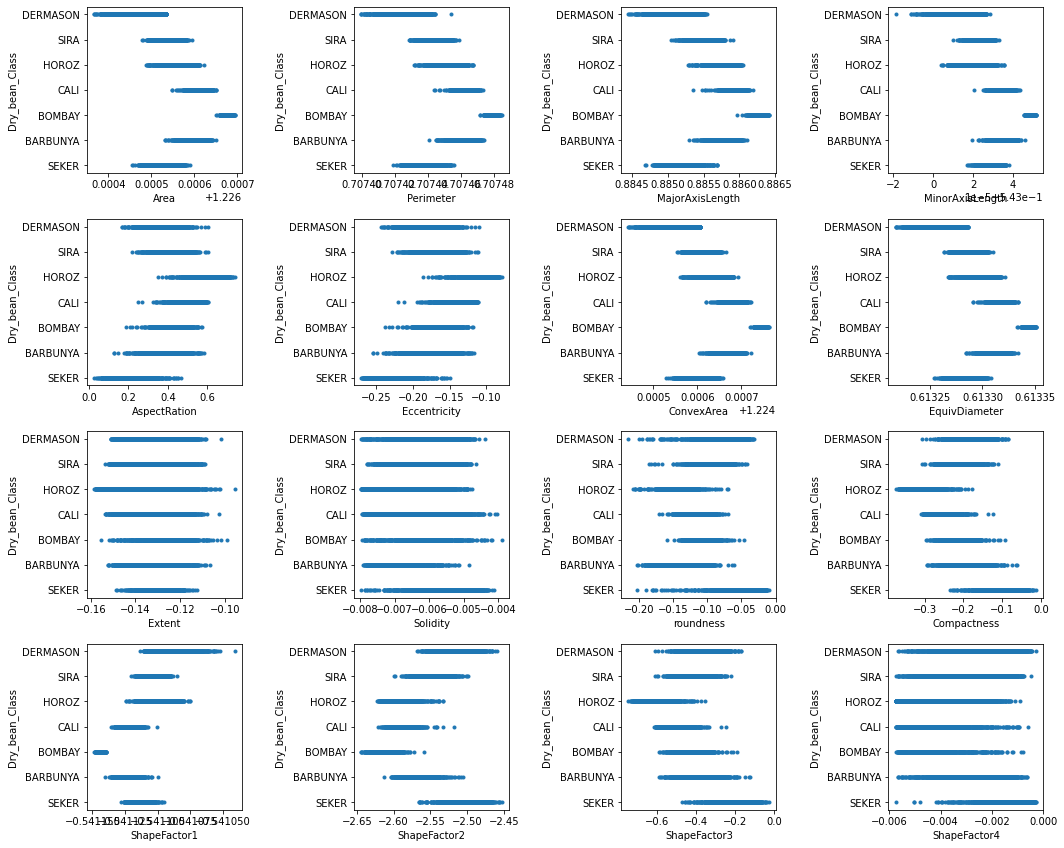

In [ ]:
data = df_new.values
X = np.array(data[:,:16])
T = np.array(data[:,16].reshape(-1))

Xnames= headers[:-1]
Tname = 'Dry_bean_Class'
plt.figure(figsize =(15,12))
for i in range (len(Xnames)):
  plt.subplot(4, 4, i+1)
  plt.plot(X[:, i],T,'.')
  plt.ylabel(Tname)
  plt.xlabel(Xnames[i])
plt.tight_layout(pad=1.5)

**Observation:**


*   The above charts show the univariate analysis of all the independent features 
against the dependent feature (Class). Just by looking at the graphs above, features such as Area, Perimeter, Major Axis Length and Minor axis length shows the maximum variance (i.e.,) minimum overlapping between the ranges for each class of dry beans
*   Features like AspectRatio, ConvexArea and EquivDiameter shows positive variance but there are clear overlappings between class ranges thereby reducing the ability to deduce the ability to identify unique classes from them alone.
*  While Features like ShapeFactor1, Compactness, ShapeFactor2 provide negative variance and are also highly overlapping in nature.
*  But we will know better variance and characteristics when the features combine and also deduce the collinear properties of independent features with one another.

##### d) *PCA for further Unsupervised Exploration of the Normalized data*

In [ ]:
# PCA for Data Exploration
X_new = X_n
model=pca(n_components=0.85, normalize=True)  #By how many components 85% of information is explained
results = model.fit_transform(X_new)
loadings=results['loadings']
scores=results['PC']
scores['lables']= df['Class']

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [85.0%] explained variance using the [16] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [85.00%] explained variance.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


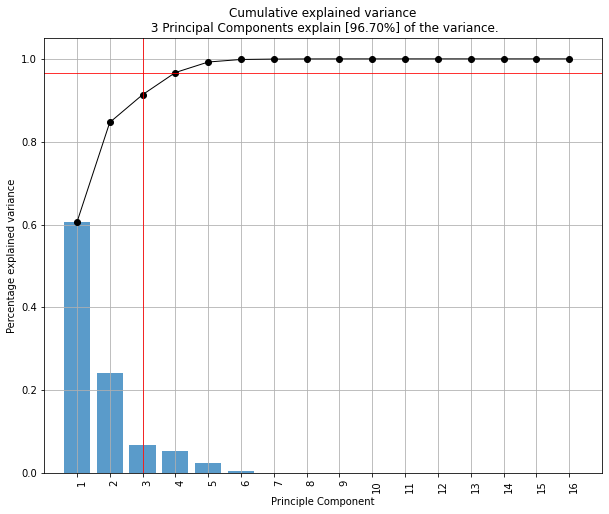

<Figure size 432x288 with 0 Axes>

In [ ]:
# Scree Plot to show how much information the scree plot containing,

model.plot(figsize=(10,8))
plt.show()

[pca] >Plot PC1 vs PC2 with loadings.


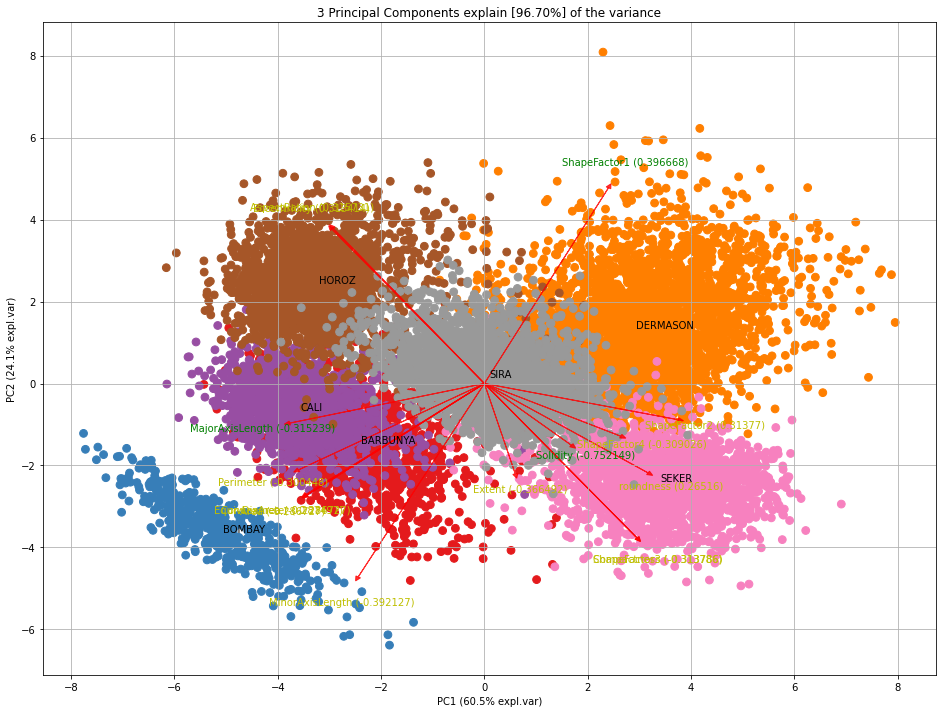

In [ ]:

# PCA Biplot 

model.biplot(n_feat=16,  legend=False, figsize=(16,12), y= y, label=True, PC= [0,1])
plt.show()

**Observation:**

* From  Scree plot we can see that first three principal components are consisting of 96.70% of the raw data.
* From the biplot we can see BOMBAY has a clear distinction from the other classes based on PC1 and PC2. We also checked the PCA plot with untreated data but, found that with box-cox tranformation the separation between the other 6 classes are more prominent in the first two PCs.

  From the loadings we can see the Area, Major Axis, Minor Axis, Equivalent Diameter and Perimeter clearly directing towards the BOMBAY class, from univariate chart also we can second that information that these features might be prominent for discriminating the class from rest. 

[pca] >Plot PC1 vs PC3 with loadings.


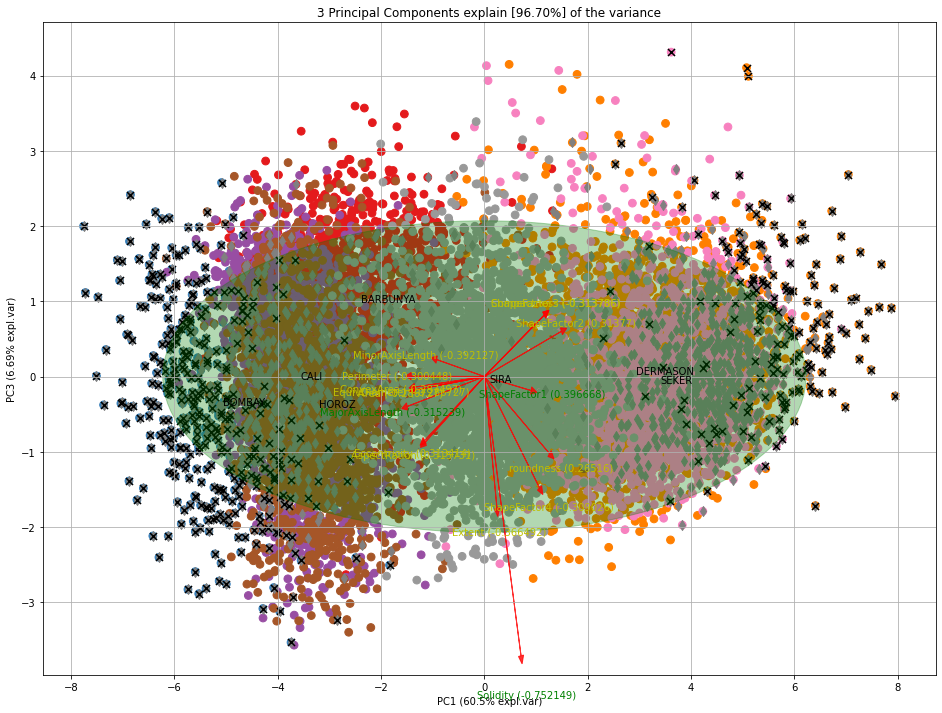

In [ ]:
# Include the outlier detection with hotelling t2
model.biplot(n_feat=16,  legend=False, figsize=(16,12), y= y, label=True, SPE=True, hotellingt2=True, PC =[0,2])
plt.show()

Data do not follow Normality, maybe that's why it is giving so many outliers, because the confidence interval calulate qchisq by considering data is normal.


Almost all don't follow normal distribution convert them with box-cox then redo the Chisq test and Outlier Detection

In [ ]:
# Data Splitting
dummified_df = pd.get_dummies(df_new)
y_class = ['Class_BARBUNYA','Class_BOMBAY','Class_CALI','Class_DERMASON','Class_HOROZ','Class_SEKER','Class_SIRA']
dummified_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_BARBUNYA,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
0,1.226455,0.707419,0.884778,0.543018,0.173390,-0.241596,1.224529,0.613253,-0.131748,-0.006017,...,-2.473073,-0.174820,-0.001145,0,0,0,0,0,1,0
1,1.226458,0.707424,0.884685,0.543021,0.091127,-0.261267,1.224533,0.613254,-0.126369,-0.006776,...,-2.456241,-0.092706,-0.001375,0,0,0,0,0,1,0
2,1.226463,0.707421,0.884831,0.543019,0.183021,-0.238916,1.224537,0.613257,-0.128015,-0.005834,...,-2.477309,-0.184157,-0.000862,0,0,0,0,0,1,0
3,1.226468,0.707425,0.884805,0.543021,0.138745,-0.250672,1.224544,0.613259,-0.126736,-0.007556,...,-2.470259,-0.144386,-0.003662,0,0,0,0,0,1,0
4,1.226469,0.707421,0.884701,0.543024,0.058301,-0.266851,1.224542,0.613259,-0.129375,-0.005441,...,-2.452339,-0.059143,-0.000777,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,1.226534,0.707441,0.885443,0.543023,0.402002,-0.170312,1.224606,0.613286,-0.142246,-0.005615,...,-2.543440,-0.404705,-0.001409,0,0,0,1,0,0,0
13607,1.226534,0.707440,0.885400,0.543024,0.359625,-0.183880,1.224606,0.613286,-0.121546,-0.005486,...,-2.535212,-0.362221,-0.001533,0,0,0,1,0,0,0
13608,1.226534,0.707441,0.885400,0.543024,0.357400,-0.184597,1.224606,0.613286,-0.139357,-0.005740,...,-2.535069,-0.361228,-0.002477,0,0,0,1,0,0,0
13609,1.226534,0.707441,0.885411,0.543024,0.366998,-0.181506,1.224607,0.613286,-0.143828,-0.006259,...,-2.537210,-0.372194,-0.003252,0,0,0,1,0,0,0


# Machine Learning Algorithms


**Overview:** 
*  In this Section we will analyse the performance of SVM, Naive Bayes, KNN and RF algorithms with unprocessed data, processed data(normalized) and after PCA (dimensionality reduction).
*  Furthermore, we analyze the importance of the data being normalized and non collinear on different algorithms.

##### *Splitting of data*

In [1]:
# Seed
seed = 100

In [ ]:
import sklearn.model_selection as model_selection

# With Untrt Data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=seed)

# With Normalized Data
X_n_train, X_n_test, y_n_train, y_n_test = model_selection.train_test_split(X_n, y, train_size=0.80, test_size=0.20, random_state= seed)

# Data from PCA
X_pc = results['PC'].iloc[:, :-1]
y_pc = results['PC'].iloc[:, -1]

# With Untrt Data
X_PC_train, X_PC_test, y_PC_train, y_PC_test = model_selection.train_test_split(X_pc, y_pc, train_size=0.80, test_size=0.20, random_state=seed)

##### a) *SVM*

In [ ]:
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
# For Data Without any tratment
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
# creating a confusion matrix
cm = confusion_matrix(y_test, poly_pred)
print(cm)

Accuracy (Polynomial Kernel):  63.75
F1 (Polynomial Kernel):  62.17
[[ 62   0 125   0  61   0   8]
 [  0 110   1   0   0   0   0]
 [ 64   0 192   0  18   0   1]
 [  0   0   0 638   0  83  14]
 [ 26   0   4   8 219  11  94]
 [  0   0   0 162   9 130 122]
 [  0   0   0  36  47  88 376]]


In [ ]:
# For Normalized Data
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_n_train, y_n_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_n_train, y_n_train)
poly_pred = poly.predict(X_n_test)
rbf_pred = rbf.predict(X_n_test)
poly_accuracy = accuracy_score(y_n_test, poly_pred)
poly_f1 = f1_score(y_n_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
# creating a confusion matrix
cm = confusion_matrix(y_n_test, poly_pred)
print(cm)

Accuracy (Polynomial Kernel):  68.84
F1 (Polynomial Kernel):  66.91
[[ 79   0  44  11   2   7 113]
 [  8   0  55   1   4   2  41]
 [  0   0 218   1  15   1  40]
 [  1   0  11 595   0  32  96]
 [  0   0  38   0 321   0   3]
 [  1   0   0  43   0 375   4]
 [  1   0  46 218   2   3 277]]


In [ ]:
# For PCA
X_train, X_test, y_train, y_test = X_PC_train, X_PC_test, y_PC_train, y_PC_test

rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

# creating a confusion matrix
cm = confusion_matrix(y_test, poly_pred)
print(cm)

Accuracy (Polynomial Kernel):  88.52
F1 (Polynomial Kernel):  88.59
[[184   1  43   0   2   0  26]
 [  0 111   0   0   0   0   0]
 [ 41   0 227   0   4   1   2]
 [  0   0   0 631   0   9  95]
 [  1   0   2   1 345   0  13]
 [  2   0   0   9   0 392  20]
 [  0   0   0  29   6   4 508]]


**Observation:** 
*  SVM (Support Vector Machines) requires the data to be non collinear and also normalized. 
*  The Accuracy score for the unprocessed data is less and also the prediction for different classes other the diagonal classes seems to be higher as inferred from confusion matrix.
*  The Accuracy score for the normalized data is more when compared to the unprocessed data since the data is normalized and also the prediction for diagonal classes are higher compared to the unprocessed data.
*  PCA uses dimensionality reduction hence reducing collinearity therefore performes the best since the data is both normalized and non collinear.


##### b) *Naive Bayes*

In [ ]:
# For Data Without any tratment

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
poly_pred = gnb.predict(X_test)
  
# accuracy on X_test
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
  
# creating a confusion matrix
cm = confusion_matrix(y_test, poly_pred)
print(cm)

Accuracy (Polynomial Kernel):  76.67
F1 (Polynomial Kernel):  76.50
[[119   1  99   0  29   0   8]
 [  0 111   0   0   0   0   0]
 [ 54   0 213   0   8   0   0]
 [  0   0   0 607   0  93  35]
 [ 14   0  13   8 288   0  39]
 [  1   0   0  62   5 310  45]
 [  0   0   0  28  40  50 429]]


In [ ]:
# For Normalized Data

X_train, X_test, y_train, y_test = X_n_train, X_n_test, y_n_train, y_n_test

gnb = GaussianNB().fit(X_train, y_train)
poly_pred = gnb.predict(X_test)
  
# accuracy on X_test
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
  
# creating a confusion matrix
cm = confusion_matrix(y_test, poly_pred)
print(cm)

Accuracy (Polynomial Kernel):  89.15
F1 (Polynomial Kernel):  89.20
[[205   0  37   0   2   1  11]
 [  1 110   0   0   0   0   0]
 [ 19   0 250   0   5   1   0]
 [  0   0   0 622   0  19  94]
 [  1   0   8   3 342   0   8]
 [  2   0   0   2   0 399  20]
 [  2   0   1  38  10   9 487]]


In [ ]:
# For PCA

X_train, X_test, y_train, y_test = X_PC_train, X_PC_test, y_PC_train, y_PC_test

gnb = GaussianNB().fit(X_train, y_train)
poly_pred = gnb.predict(X_test)
  
# accuracy on X_test
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy : ', "%.2f" % (poly_accuracy*100))
print('F1 Score: ', "%.2f" % (poly_f1*100))
  
# creating a confusion matrix
cm = confusion_matrix(y_test, poly_pred)
print(cm)

Accuracy :  88.26
F1 Score:  88.23
[[175   0  61   0   4   1  15]
 [  1 110   0   0   0   0   0]
 [ 19   3 242   0   6   1   4]
 [  0   0   0 632   0  11  92]
 [  1   0   4   3 350   0   4]
 [  3   0   0   8   0 398  14]
 [  2   0   1  37  14   9 484]]


**Observation:** 
*  Naive Bayes Classifier requires the data to be normalized since it assumes that the presence of one feature does not affect the presence or absence of other feature no matter upto which extent the features are interrelated.So,multi collinearity does not affect the Naive Bayes. 
*  The Accuracy score for the unprocessed data is less and also the prediction for different classes other the diagonal classes seems to be higher as inferred from confusion matrix.
*  The Accuracy score for the normalized data is the best since the data is normalized and also the prediction for diagonal classes are higher in the confusion matrix.
*  PCA uses dimensionality reduction hence reducing collinearity but there is also the downside where information loss happens due to which the accuracy is slightly less compared to the normalized data.

##### c) *KNN*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Minimum error:- 0.24621631598375784 at K = 1


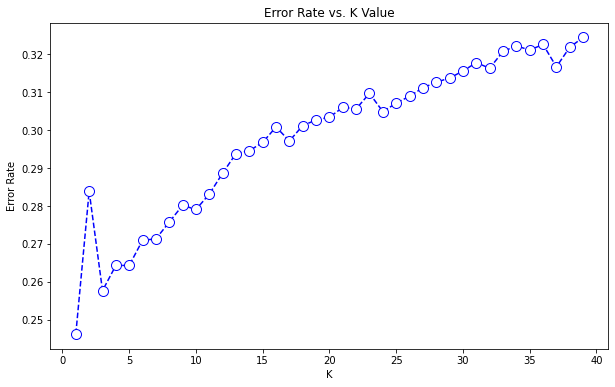

In [ ]:
# Untreated Data

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='white', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)

In [ ]:

knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)

# creating a confusion matrix
knn_predictions = knn.predict(X_test) 

# accuracy on X_test
poly_accuracy = accuracy_score(y_test, knn_predictions)
poly_f1 = f1_score(y_test, knn_predictions, average='weighted')
print('Accuracy : ', "%.2f" % (poly_accuracy*100))
print('F1 Score: ', "%.2f" % (poly_f1*100))  

cm = confusion_matrix(y_test, knn_predictions)
print(cm)

Accuracy :  72.09
F1 Score:  71.74
[[128   0  78   0  45   0   5]
 [  0 110   1   0   0   0   0]
 [ 91   0 168   0  15   0   1]
 [  0   0   0 657   1  43  34]
 [ 36   0  14   8 242   0  62]
 [  0   0   0 101   8 241  73]
 [  1   0   0  63  51  25 407]]


In [ ]:
# Normalized Data
X_train, X_test, y_train, y_test = X_n_train, X_n_test, y_n_train, y_n_test

# Untreated Data

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='white', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)

# creating a confusion matrix
knn_predictions = knn.predict(X_test) 

# accuracy on X_test
poly_accuracy = accuracy_score(y_test, knn_predictions)
poly_f1 = f1_score(y_test, knn_predictions, average='weighted')
print('Accuracy : ', "%.2f" % (poly_accuracy*100))
print('F1 Score: ', "%.2f" % (poly_f1*100))  

cm = confusion_matrix(y_test, knn_predictions)
print(cm)

Accuracy :  90.66
F1 Score:  90.70
[[221   0  24   0   2   0   9]
 [  2 107   1   0   0   1   0]
 [  7   0 261   0   4   1   2]
 [  4   0   0 662   1  13  55]
 [  2   0   7   2 339   0  12]
 [  4   0   0  14   0 391  14]
 [  5   0   4  54   4   5 475]]


In [ ]:
# For PCA

X_train, X_test, y_train, y_test = X_PC_train, X_PC_test, y_PC_train, y_PC_test

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='white', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)

# creating a confusion matrix
knn_predictions = knn.predict(X_test) 

# accuracy on X_test
poly_accuracy = accuracy_score(y_test, knn_predictions)
poly_f1 = f1_score(y_test, knn_predictions, average='weighted')
print('Accuracy : ', "%.2f" % (poly_accuracy*100))
print('F1 Score: ', "%.2f" % (poly_f1*100))  

cm = confusion_matrix(y_test, knn_predictions)
print(cm)

Accuracy :  89.44
F1 Score:  89.42
[[191   0  48   0   2   1  14]
 [  1 110   0   0   0   0   0]
 [ 39   0 231   0   3   1   1]
 [  0   0   0 692   1   9  33]
 [  2   0   6   2 342   0  10]
 [  2   0   0  12   0 395  14]
 [  5   0   2  65   6   7 462]]


**Observation:** 
*  Knn requires the data to be non collinear and also normalized. 
*  The Accuracy score for the unprocessed data is less and also the prediction for different classes other the diagonal classes seems to be higher as inferred from confusion matrix.
*  The Accuracy score for the normalized data is more when compared to the unprocessed data since the data is normalized and also the prediction for diagonal classes are higher compared to the unprocessed data.
*  When Using PCA for Knn algorithm, which is the more preferred as compared to normalization since knn is an unsupervised approach and we can see that the performance is more or less same as the normalized data.

##### d) *RF*

In [ ]:
# Untreated Data

# importing the module
from sklearn.preprocessing import StandardScaler

# initializing the standard scalling method
scaler = StandardScaler()

# scalling the input values
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
classifier = RandomForestClassifier()

# fit the model
classifier.fit(X_train, y_train)

# testing the model
y_pred = classifier.predict(X_test)

# importing accuracy score

poly_accuracy = accuracy_score(y_test, y_pred)
poly_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy : ', "%.2f" % (poly_accuracy*100))
print('F1 Score: ', "%.2f" % (poly_f1*100))
cm = confusion_matrix(y_test, y_pred)
print(cm) 

Accuracy :  92.51
F1 Score:  92.51
[[230   1  15   0   2   2   6]
 [  0 111   0   0   0   0   0]
 [  6   0 262   0   5   1   1]
 [  0   0   0 685   1   8  41]
 [  0   0   5   2 343   0  12]
 [  1   0   0  12   0 399  11]
 [  0   0   1  54   7   9 476]]


In [ ]:
# Importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.97      0.90      0.93       256
      BOMBAY       0.99      1.00      1.00       111
        CALI       0.93      0.95      0.94       275
    DERMASON       0.91      0.93      0.92       735
       HOROZ       0.96      0.95      0.95       362
       SEKER       0.95      0.94      0.95       423
        SIRA       0.87      0.87      0.87       547

    accuracy                           0.93      2709
   macro avg       0.94      0.93      0.94      2709
weighted avg       0.93      0.93      0.93      2709



In [ ]:
# classifing the features according to their importance
feature_imp = pd.Series(classifier.feature_importances_,index=[i for i in X_n.columns]).sort_values(ascending=False)

# printing
print(feature_imp)

Compactness        0.104957
Perimeter          0.097285
ShapeFactor3       0.091664
ShapeFactor1       0.091032
MinorAxisLength    0.090385
MajorAxisLength    0.076606
ConvexArea         0.069518
roundness          0.060042
AspectRation       0.056729
Eccentricity       0.054691
EquivDiameter      0.054078
Area               0.044659
ShapeFactor2       0.044216
ShapeFactor4       0.032872
Solidity           0.019793
Extent             0.011474
dtype: float64


In [ ]:
X_n.columns[11]

'Compactness'

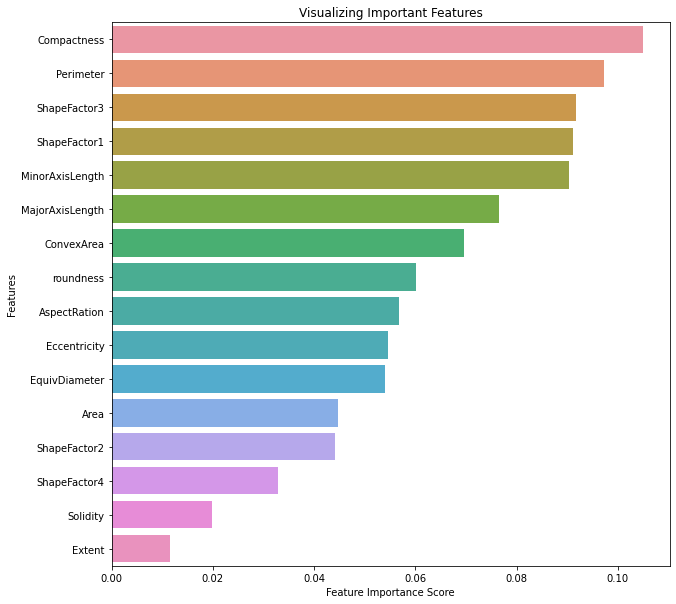

In [ ]:
# importing the modules
import matplotlib.pyplot as plt
import seaborn as sns

# graph size
plt.figure(figsize=(10,10))

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
# For Normalized Data

X_train, X_test, y_train, y_test = X_n_train, X_n_test, y_n_train, y_n_test



# importing the module
from sklearn.preprocessing import StandardScaler

# initializing the standard scalling method
scaler = StandardScaler()

# scalling the input values
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
classifier = RandomForestClassifier()

# fit the model
classifier.fit(X_train, y_train)

# testing the model
y_pred = classifier.predict(X_test)

# importing accuracy score

poly_accuracy = accuracy_score(y_test, y_pred)
poly_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy : ', "%.2f" % (poly_accuracy*100))
print('F1 Score: ', "%.2f" % (poly_f1*100))
cm = confusion_matrix(y_test, y_pred)
print(cm) 


Accuracy :  92.65
F1 Score:  92.66
[[232   1  14   0   2   1   6]
 [  0 111   0   0   0   0   0]
 [  6   0 263   0   4   1   1]
 [  0   0   0 685   0   8  42]
 [  0   0   4   2 346   0  10]
 [  1   0   0  12   0 400  10]
 [  0   0   1  58   7   8 473]]


In [ ]:
# For PCA

X_train, X_test, y_train, y_test = X_PC_train, X_PC_test, y_PC_train, y_PC_test

# importing the module
from sklearn.preprocessing import StandardScaler

# initializing the standard scalling method
scaler = StandardScaler()

# scalling the input values
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
classifier = RandomForestClassifier()

# fit the model
classifier.fit(X_train, y_train)

# testing the model
y_pred = classifier.predict(X_test)

# importing accuracy score

poly_accuracy = accuracy_score(y_test, y_pred)
poly_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy : ', "%.2f" % (poly_accuracy*100))
print('F1 Score: ', "%.2f" % (poly_f1*100))
cm = confusion_matrix(y_test, y_pred)
print(cm) 

Accuracy :  89.00
F1 Score:  88.93
[[174   0  64   0   2   1  15]
 [  1 109   1   0   0   0   0]
 [ 28   1 240   0   5   1   0]
 [  0   0   0 682   0   9  44]
 [  2   0   3   2 345   0  10]
 [  3   0   0  12   0 395  13]
 [  4   0   2  60   6   9 466]]


**Observation:** 
*  Random forest is a supervised learning algorithm therefore collinearity of the independent features is not an issue but requires the data to be normalized. 
*  The Accuracy score for the unprocessed data is less and also the prediction for different classes other the diagonal classes seems to be higher as inferred from confusion matrix.
*  The Accuracy score for the normalized data is more when compared to the unprocessed data since the data is normalized and also the prediction for diagonal classes are higher compared to the unprocessed data.
*  PCA uses dimensionality reduction hence reducing collinearity but there is also the downside where information loss happens due to which the accuracy is slightly less compared to the normalized data.